In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [14]:
a_path = "datasets/DCASE2025T2/Development/bearing/test/section_00_source_test_anomaly_0000_noAttribute.wav"
# a_path = "datasets/DCASE2025T2/Development/ToyCar/train/section_00_source_train_normal_0002_car_B1_spd_31V_mic_1.wav"
n_path = "datasets/DCASE2025T2/Development/bearing/test/section_00_target_test_normal_0000_noAttribute.wav"
a_amp, a_sr = librosa.load(a_path, sr=None, mono=True)
n_amp, n_sr = librosa.load(n_path, sr=None, mono=True)

In [15]:
a_stft = librosa.stft(a_amp, n_fft=1024, hop_length=512)
n_stft = librosa.stft(n_amp, n_fft=1024, hop_length=512)

a_mag = np.abs(a_stft)
n_mag = np.abs(n_stft)

a_freq = librosa.fft_frequencies(sr=a_sr, n_fft=1024)
n_freq = librosa.fft_frequencies(sr=n_sr, n_fft=1024)

In [16]:
a_mag

array([[0.2615496 , 0.07585614, 0.10354178, ..., 0.01713383, 0.02669146,
        0.11896414],
       [0.2181527 , 0.19547682, 0.11249004, ..., 0.03047283, 0.0952348 ,
        0.14636518],
       [0.09561747, 0.20535104, 0.08123702, ..., 0.11571246, 0.07963531,
        0.25146583],
       ...,
       [0.00274174, 0.01200024, 0.00136641, ..., 0.00478965, 0.00334702,
        0.0041396 ],
       [0.00516402, 0.01232709, 0.00537831, ..., 0.00536138, 0.004158  ,
        0.00919133],
       [0.00645508, 0.00566971, 0.00086014, ..., 0.00074565, 0.00698479,
        0.00924317]], shape=(513, 313), dtype=float32)

In [17]:
a_freq

array([   0.   ,   15.625,   31.25 ,   46.875,   62.5  ,   78.125,
         93.75 ,  109.375,  125.   ,  140.625,  156.25 ,  171.875,
        187.5  ,  203.125,  218.75 ,  234.375,  250.   ,  265.625,
        281.25 ,  296.875,  312.5  ,  328.125,  343.75 ,  359.375,
        375.   ,  390.625,  406.25 ,  421.875,  437.5  ,  453.125,
        468.75 ,  484.375,  500.   ,  515.625,  531.25 ,  546.875,
        562.5  ,  578.125,  593.75 ,  609.375,  625.   ,  640.625,
        656.25 ,  671.875,  687.5  ,  703.125,  718.75 ,  734.375,
        750.   ,  765.625,  781.25 ,  796.875,  812.5  ,  828.125,
        843.75 ,  859.375,  875.   ,  890.625,  906.25 ,  921.875,
        937.5  ,  953.125,  968.75 ,  984.375, 1000.   , 1015.625,
       1031.25 , 1046.875, 1062.5  , 1078.125, 1093.75 , 1109.375,
       1125.   , 1140.625, 1156.25 , 1171.875, 1187.5  , 1203.125,
       1218.75 , 1234.375, 1250.   , 1265.625, 1281.25 , 1296.875,
       1312.5  , 1328.125, 1343.75 , 1359.375, 1375.   , 1390.

In [18]:
import numpy as np

# Compute average magnitude per frequency bin
mean_magnitudes = np.mean(a_mag, axis=1)

# Get indices of top 10 magnitudes
top_indices = np.argsort(mean_magnitudes)[-10:][::-1]  # descending order

# Get corresponding frequencies and magnitudes
top_freqs = a_freq[top_indices]
top_mags = mean_magnitudes[top_indices]

print("Top 10 frequencies with highest magnitudes:")
for freq, mag in zip(top_freqs, top_mags):
    print(f"Frequency: {freq:.2f} Hz, Magnitude: {mag:.4f}")

top_freqs


Top 10 frequencies with highest magnitudes:
Frequency: 78.12 Hz, Magnitude: 0.3258
Frequency: 93.75 Hz, Magnitude: 0.3200
Frequency: 62.50 Hz, Magnitude: 0.2962
Frequency: 46.88 Hz, Magnitude: 0.2753
Frequency: 531.25 Hz, Magnitude: 0.2525
Frequency: 109.38 Hz, Magnitude: 0.2325
Frequency: 31.25 Hz, Magnitude: 0.1921
Frequency: 125.00 Hz, Magnitude: 0.1758
Frequency: 546.88 Hz, Magnitude: 0.1643
Frequency: 265.62 Hz, Magnitude: 0.1537


array([ 78.125,  93.75 ,  62.5  ,  46.875, 531.25 , 109.375,  31.25 ,
       125.   , 546.875, 265.625])

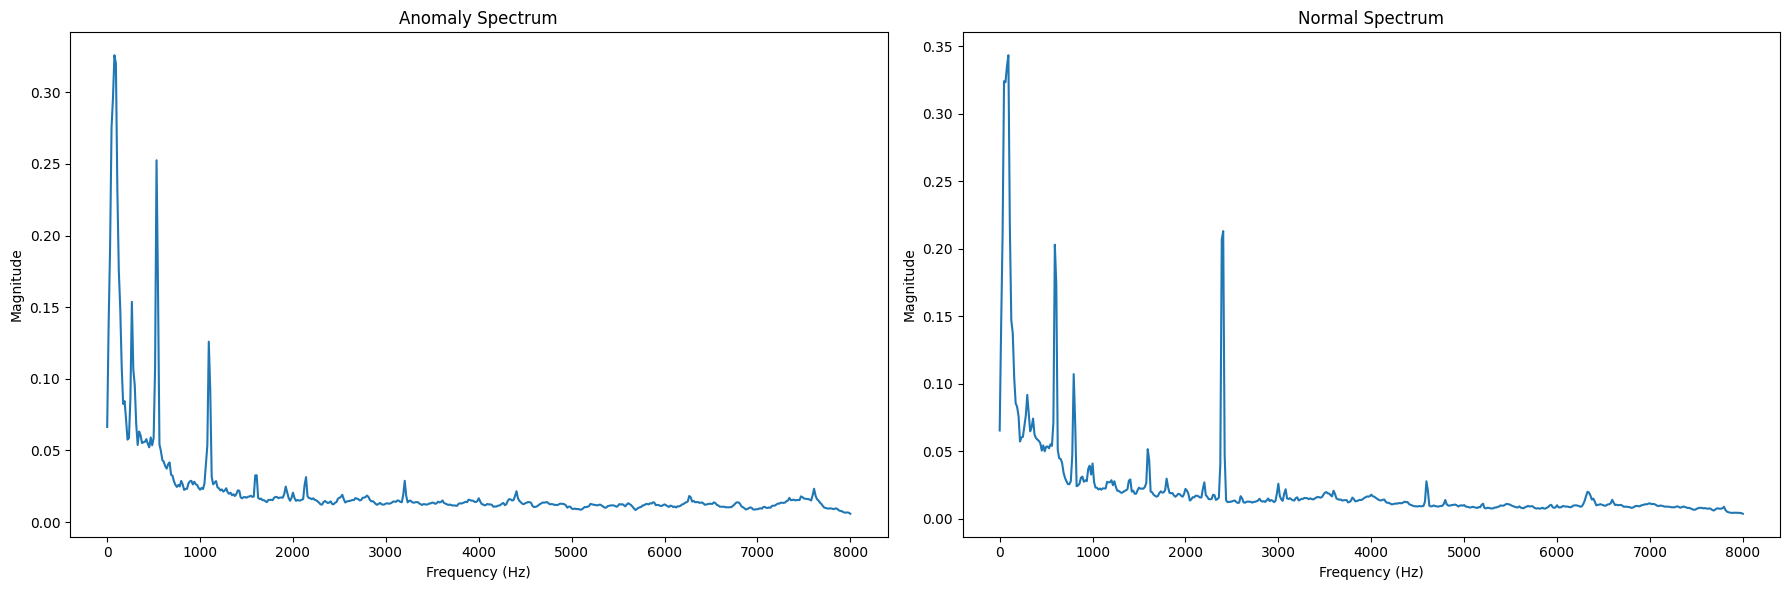

In [19]:
# Plot the two spectra side by side
plt.figure(figsize=(18, 6))

# Plot the first spectrum
plt.subplot(1, 2, 1)
plt.plot(a_freq, np.mean(a_mag, axis=1))  # Average magnitude across time frames
plt.title("Anomaly Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Plot the second spectrum
plt.subplot(1, 2, 2)
plt.plot(n_freq, np.mean(n_mag, axis=1))  # Average magnitude across time frames
plt.title("Normal Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Display the plots
plt.tight_layout()
plt.show()

In [20]:
anomaly = librosa.feature.melspectrogram(
    y=a_amp,
    sr=a_sr,
    n_fft=1024,
    hop_length=512,
    n_mels=128
)
anomaly = librosa.power_to_db(anomaly, ref=np.max)

normal = librosa.feature.melspectrogram(
    y=n_amp,
    sr=n_sr,
    n_fft=1024,
    hop_length=512,
    n_mels=128
)
normal = librosa.power_to_db(normal, ref=np.max)
anomaly

array([[-13.668538 , -12.1665125, -18.367363 , ..., -19.671745 ,
        -19.336117 , -11.948131 ],
       [-14.457717 ,  -9.63215  , -19.027653 , ..., -11.830445 ,
         -9.029422 ,  -2.9188318],
       [ -7.798341 ,  -6.1568613, -13.969701 , ...,  -3.164525 ,
         -2.3176374,  -5.265153 ],
       ...,
       [-37.527325 , -32.85475  , -33.534172 , ..., -31.265167 ,
        -31.597786 , -34.53154  ],
       [-35.64293  , -34.1716   , -35.78265  , ..., -33.801804 ,
        -34.022568 , -34.09527  ],
       [-42.01455  , -37.95035  , -37.647144 , ..., -36.372097 ,
        -36.395695 , -37.25536  ]], shape=(128, 313), dtype=float32)

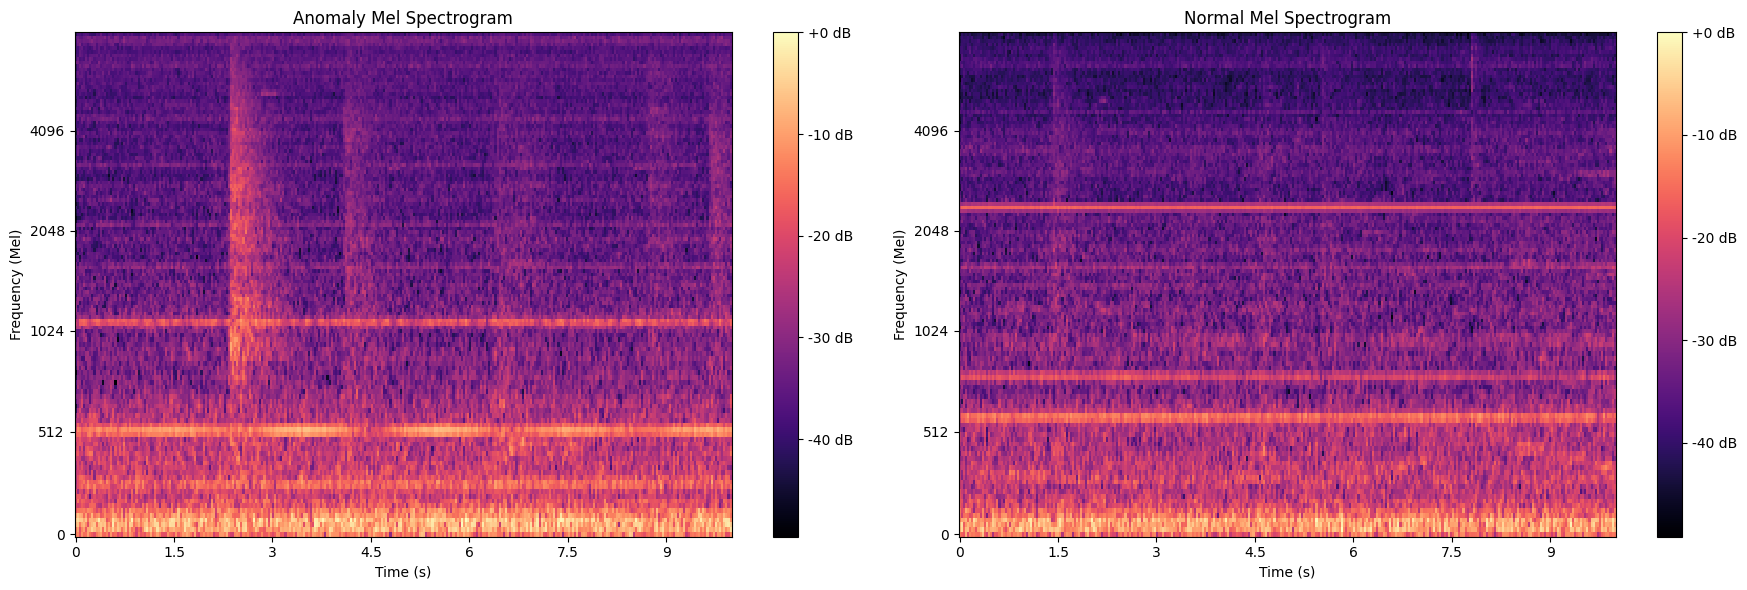

In [21]:
# Assuming you have mel_spectrogram and mel_spectrogram_2 defined along with sampling_rate
plt.figure(figsize=(18, 6))  # Increase width to fit two plots

# Plot the first spectrogram
plt.subplot(1, 2, 1)  # (rows, columns, position)
librosa.display.specshow(anomaly, sr=a_sr, hop_length=512, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Anomaly Mel Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Mel)")

# Plot the second spectrogram
plt.subplot(1, 2, 2)  # (rows, columns, position)
librosa.display.specshow(normal, sr=n_sr, hop_length=512, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Normal Mel Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Mel)")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


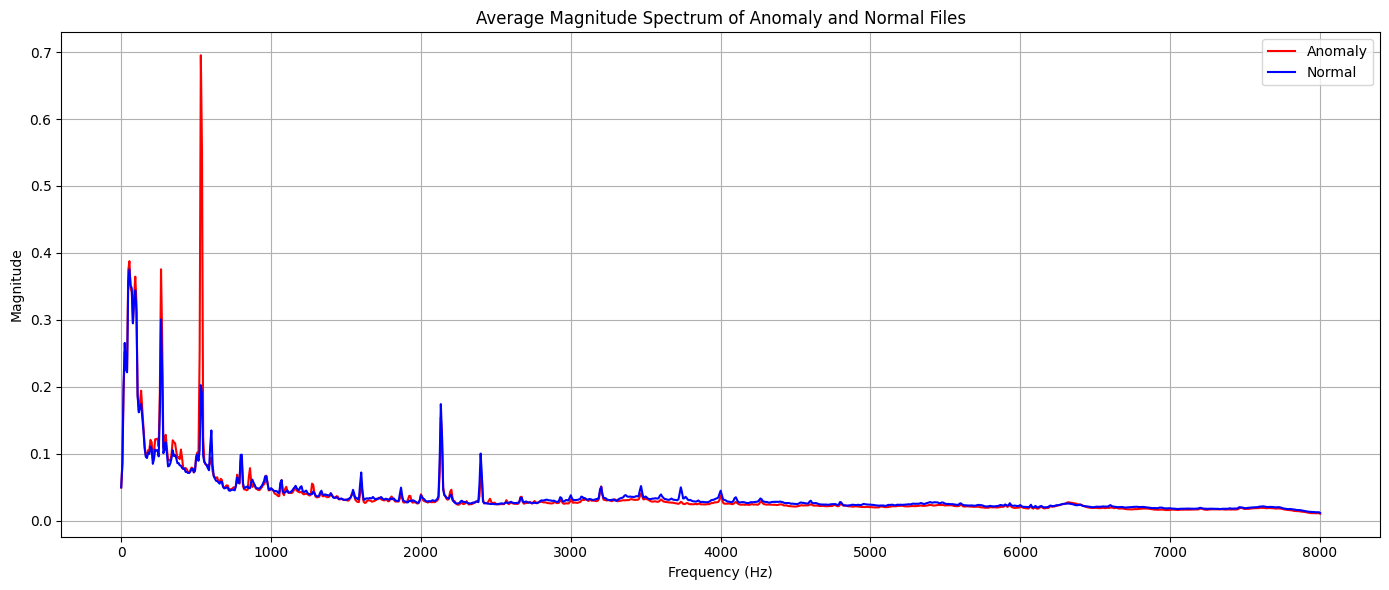

In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

def plot_average_spectrum(folder_path):
    # Lists to store the magnitude spectrums of "anomaly" and "normal" files
    anomaly_magnitudes = []
    normal_magnitudes = []

    # Loop through all .wav files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder_path, filename)
            
            # Load the audio file
            y, sr = librosa.load(file_path, sr=None)
            
            # Compute the STFT of the audio signal
            stft = librosa.stft(y)
            magnitude = np.abs(stft)
            # magnitude = np.log1p(magnitude)
            
            # Check if the file contains "anomaly" or "normal" in its filename
            if "anomaly" in filename:
                anomaly_magnitudes.append(np.mean(magnitude, axis=1))  # Mean across time
            elif "normal" in filename:
                normal_magnitudes.append(np.mean(magnitude, axis=1))  # Mean across time

    # Compute the average magnitude spectrum for both anomaly and normal
    if anomaly_magnitudes:
        avg_anomaly_spectrum = np.mean(anomaly_magnitudes, axis=0)
    else:
        avg_anomaly_spectrum = None

    if normal_magnitudes:
        avg_normal_spectrum = np.mean(normal_magnitudes, axis=0)
    else:
        avg_normal_spectrum = None

    # Plot the average spectra
    plt.figure(figsize=(14, 6))

    if avg_anomaly_spectrum is not None:
        plt.plot(librosa.fft_frequencies(sr=sr), avg_anomaly_spectrum, label='Anomaly', color='red')
    if avg_normal_spectrum is not None:
        plt.plot(librosa.fft_frequencies(sr=sr), avg_normal_spectrum, label='Normal', color='blue')

    plt.title('Average Magnitude Spectrum of Anomaly and Normal Files')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_average_spectrum('datasets/DCASE2025T2/Development/bearing/test/')


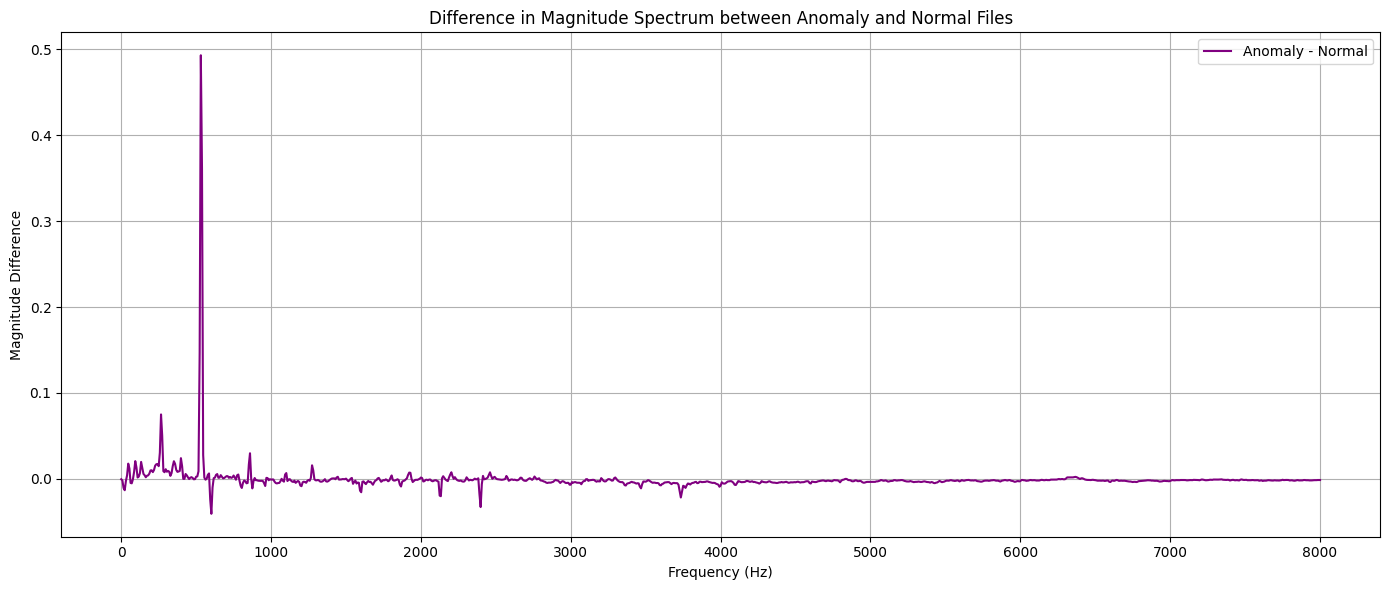

In [23]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum_difference(folder_path):
    # Lists to store the magnitude spectrums of "anomaly" and "normal" files
    anomaly_magnitudes = []
    normal_magnitudes = []

    # Loop through all .wav files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder_path, filename)
            
            # Load the audio file
            y, sr = librosa.load(file_path, sr=None)
            
            # Compute the STFT of the audio signal
            stft = librosa.stft(y)
            magnitude = np.abs(stft)
            # magnitude = np.log1p(magnitude)
            
            # Check if the file contains "anomaly" or "normal" in its filename
            if "anomaly" in filename:
                anomaly_magnitudes.append(np.mean(magnitude, axis=1))  # Mean across time
            elif "normal" in filename:
                normal_magnitudes.append(np.mean(magnitude, axis=1))  # Mean across time

    # Compute the average magnitude spectrum for both anomaly and normal
    if anomaly_magnitudes:
        avg_anomaly_spectrum = np.mean(anomaly_magnitudes, axis=0)
    else:
        avg_anomaly_spectrum = None

    if normal_magnitudes:
        avg_normal_spectrum = np.mean(normal_magnitudes, axis=0)
    else:
        avg_normal_spectrum = None

    # Compute the difference between anomaly and normal
    if avg_anomaly_spectrum is not None and avg_normal_spectrum is not None:
        spectrum_difference = avg_anomaly_spectrum - avg_normal_spectrum
    else:
        spectrum_difference = None

    # Plot the difference spectrum
    plt.figure(figsize=(14, 6))

    if spectrum_difference is not None:
        plt.plot(librosa.fft_frequencies(sr=sr), spectrum_difference, label='Anomaly - Normal', color='purple')

    plt.title('Difference in Magnitude Spectrum between Anomaly and Normal Files')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude Difference')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_spectrum_difference('datasets/DCASE2025T2/Development/bearing/test/')